# Tutorial 6: Create echograms (ToDo)
### `themachinethatgoesping` tutorial series

`themachinethatgoesping` concepts covered:
- Build an echogram

In [1]:
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import themachinethatgoesping as theping

# data folder
folder = r"../unittest_data/"

# list raw data files
files = theping.echosounders.index_functions.find_files(folder,['.all','.wcd'])
files.sort()

# create the file handler
cache_files = theping.echosounders.index_functions.get_index_paths(files)
fh = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files,cache_files,init=True)

# get pings that contain WCD
all_pings = theping.pingprocessing.filter_pings.by_features(fh.get_pings(),['watercolumn.amplitudes'])

# check data with the WCI Viewer
viewer = theping.pingprocessing.widgets.WCIViewer(all_pings)

Found 18 files
indexing files ⢀ 98% :00s<00m:00s] [Found: 729 datagrams in 18 files (10MB)]                                         
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


### Build an echogram

Text(0, 0.5, 'SampleNr')

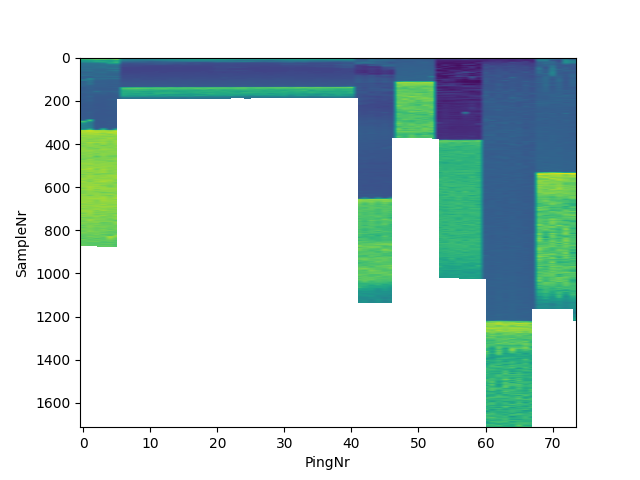

In [2]:
echodata = theping.pingprocessing.watercolumn.echograms.EchoData.from_pings(all_pings)

image, extent = echodata.build_image()

#plot
fig,ax = theping.pingprocessing.core.create_figure("echodata sample_nr/ping_nr")
ax.imshow(image.transpose(),extent=extent,aspect='auto')
ax.set_xlabel('PingNr')
ax.set_ylabel('SampleNr')

Text(0, 0.5, 'SampleNr')

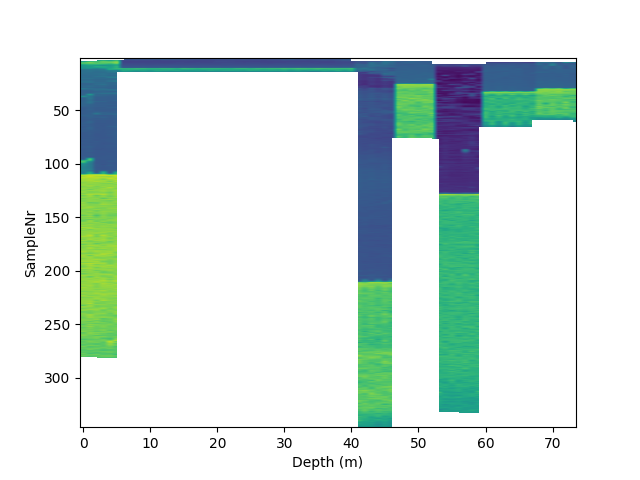

In [3]:
echodata.set_y_axis_depth()
image, extent = echodata.build_image()

#plot
fig,ax = theping.pingprocessing.core.create_figure("echodata depth/time")
ax.imshow(image.transpose(),extent=extent,aspect='auto')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('SampleNr')

In [4]:
#split the survey to not include to large time differences
#make a new block if the difference between to consequtive ping is > 1000 seconds
pings_per_survey = theping.pingprocessing.split_pings.by_time_difference(all_pings,1000)

for key,pings in pings_per_survey.items():
    print(key,len(pings))

0 6
1 35
2 6
3 6
4 7
5 8
6 6


(15.492264441343458, 0.5628622073393602)

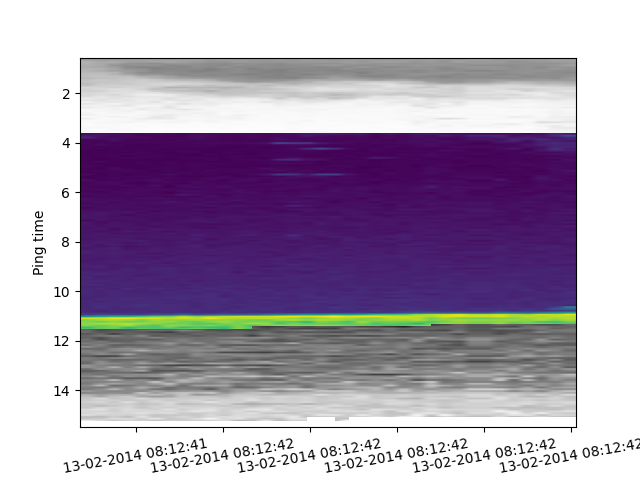

In [5]:
N=0
#make time/depths echogram for survey N


pings = pings_per_survey[1]
echodata = theping.pingprocessing.watercolumn.echograms.EchoData.from_pings(pings)

echodata.set_y_axis_depth()
echodata.set_x_axis_date_time()
image, extent = echodata.build_image()

#plot
fig,ax = theping.pingprocessing.core.create_figure("echodata subselection")
ax.imshow(image.transpose(),extent=extent,aspect='auto', cmap='Greys')
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Ping time')
ylim=ax.get_ylim()

#helper to make the date plotting better
theping.pingprocessing.core.set_ax_timeformat(ax)

#select only data from 30% - > 105% of the minimum slant range
pss = theping.echosounders.pingtools.PingSampleSelector()
pss.select_minslant_range_percent(30,105)
echodata = theping.pingprocessing.watercolumn.echograms.EchoData.from_pings(pings, pss=pss)
echodata.set_y_axis_depth()
echodata.set_x_axis_date_time()
image, extent = echodata.build_image()

ax.imshow(image.transpose(),extent=extent,aspect='auto')
ax.set_ylim(ylim)

In [6]:
pss_all = theping.echosounders.pingtools.PingSampleSelector()

pss_center = theping.echosounders.pingtools.PingSampleSelector()
pss_center.select_minslant_range_percent(0,98)
pss_center.select_beam_range_by_angles(-90,90,3)

pss_left = theping.echosounders.pingtools.PingSampleSelector()
pss_left.select_beam_range_by_angles(0,90,3)
pss_left.select_minslant_range_percent(102,None)
pss_left.select_bottom_range_percent(0,98)

pss_right = theping.echosounders.pingtools.PingSampleSelector()
pss_right.select_beam_range_by_angles(-90,0,3)
pss_right.select_minslant_range_percent(102,None)
pss_right.select_bottom_range_percent(0,98)

viewer = theping.pingprocessing.widgets.WCIViewer(pings, ping_sample_selector=pss_left)

In [9]:

echodata_center = theping.pingprocessing.watercolumn.echograms.EchogramBuilder.from_pings(pings,pss=pss_center)
echodata_left = theping.pingprocessing.watercolumn.echograms.EchogramBuilder.from_pings(pings,pss=pss_left)
echodata_right = theping.pingprocessing.watercolumn.echograms.EchogramBuilder.from_pings(pings,pss=pss_right)

for e in [echodata_center,echodata_left,echodata_right]:
    e.set_x_axis_date_time(max_steps=4000)
    e.set_y_axis_depth(max_samples=512)

In [10]:
#echogram viewer
echoviewer = theping.pingprocessing.widgets.EchogramViewer([echodata_center,echodata_left,echodata_right],names=['center','left','right'])